<h3>Importing the necessary libraries</h3>

In [9]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [10]:
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

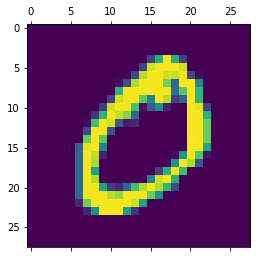

In [14]:
plt.matshow(X_train[1])

In [15]:
y_train[1]

0

In [16]:
X_train = y_predicted = model.predict(X_test_flattened)
y_predicted[0]
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [17]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [22]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [25]:

model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.2832 - accuracy: 0.9214 - val_loss: 0.0968 - val_accuracy: 0.9716
Epoch 2/10
 - 17s - loss: 0.0854 - accuracy: 0.9759 - val_loss: 0.0620 - val_accuracy: 0.9792
Epoch 3/10
 - 17s - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0512 - val_accuracy: 0.9826
Epoch 4/10
 - 17s - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.0486 - val_accuracy: 0.9830
Epoch 5/10
 - 17s - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.0483 - val_accuracy: 0.9838
Epoch 6/10
 - 18s - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 7/10
 - 18s - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0392 - val_accuracy: 0.9868
Epoch 8/10
 - 17s - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 9/10
 - 17s - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0404 - val_accuracy: 0.9864
Epoch 10/10
 - 17s - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0382 - val_accuracy: 0.9885
Accuracy

In [27]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([2.0435280e-09, 1.0471918e-09, 1.5563002e-07, 3.3435822e-07,
       2.6403763e-11, 3.2700004e-08, 3.0252852e-14, 9.9999881e-01,
       1.3422487e-08, 6.5403754e-07], dtype=float32)

Lets try with two convolutional and two maxpooling layers

In [29]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [30]:
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.4283 - accuracy: 0.8808 - val_loss: 0.1196 - val_accuracy: 0.9644
Epoch 2/10
 - 16s - loss: 0.1005 - accuracy: 0.9707 - val_loss: 0.0725 - val_accuracy: 0.9764
Epoch 3/10
 - 17s - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0572 - val_accuracy: 0.9816
Epoch 4/10
 - 17s - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0560 - val_accuracy: 0.9811
Epoch 5/10
 - 17s - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 6/10
 - 17s - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 7/10
 - 17s - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 8/10
 - 17s - loss: 0.0386 - accuracy: 0.9884 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 9/10
 - 16s - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0367 - val_accuracy: 0.9882
Epoch 10/10
 - 18s - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0368 - val_accuracy: 0.9884
Accuracy:

<h4>ACCURACY OBTAINED IS 98.84%</h4>